In [11]:
import skbio
#from skbio import TreeNode, DistanceMatrix, Alignment
from skbio import TreeNode, DistanceMatrix, TabularMSA, DNA
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
aln = DNA.read("../data/all_genomes.fasta")

In [16]:
dist = aln.distances()

AttributeError: 'TabularMSA' object has no attribute 'distances'

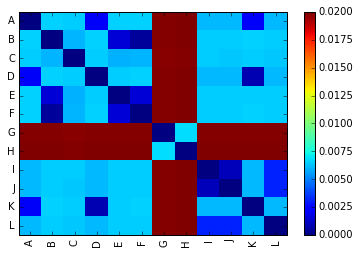

In [4]:
dist

In [5]:
1/dist['G']["ABCDEFGHIJKL".index("F")]

50.288350344411484

In [8]:
samp = skbio.read("../data/sample.nwk", into=TreeNode)

In [9]:
tdist = samp.tip_tip_distances()

In [10]:
num_runs = 3
runs = DistanceMatrix(
    np.repeat(np.repeat(dist.data,num_runs, axis=1), num_runs, axis=0))
runs.ids = ['{}-{}'.format(g, i) for g in dist.ids for i in range(num_runs)]
runs.write("../data/runs.dist")

NameError: name 'dist' is not defined

In [9]:
truth = runs.condensed_form()

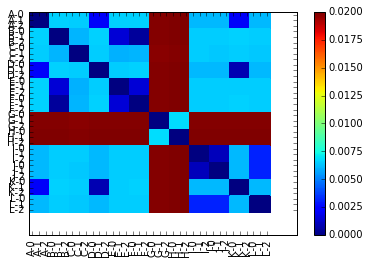

In [10]:
runs

In [45]:
kwip_mat = DistanceMatrix.read("../data/kwip/0.1.10/0.1.10-20x-wip.dist")

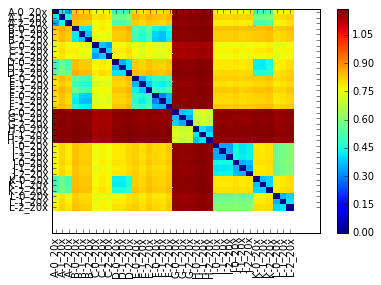

In [47]:
kwip_mat

In [46]:
ip_mat = DistanceMatrix.read("../data/kwip/0.1.10/0.1.10-20x-ip.dist")

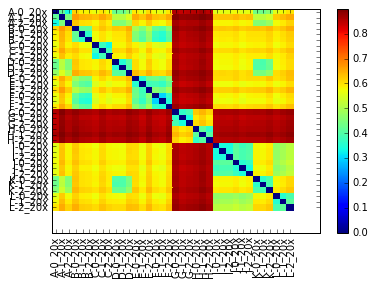

In [48]:
ip_mat

In [49]:
wip = kwip_mat.condensed_form()
ip = ip_mat.condensed_form()

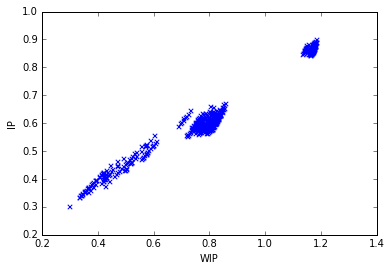

In [50]:
fig, ax = plt.subplots()
ax.scatter(wip, ip, marker='x')
ax.set_ylabel('IP')
ax.set_xlabel('WIP')

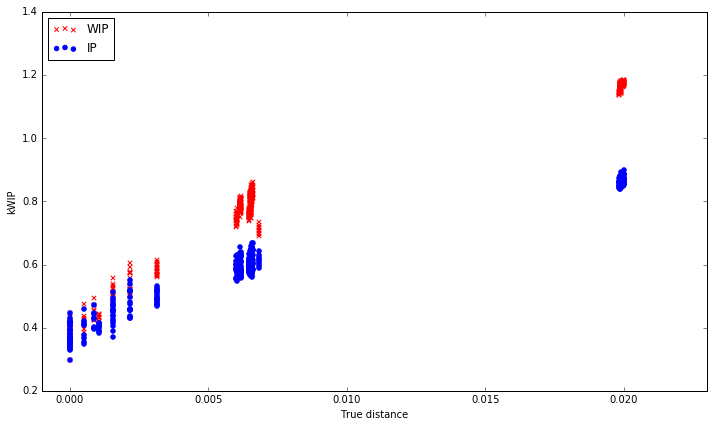

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
w = ax.scatter(truth, wip, marker='x', color='r', label='WIP')
i = ax.scatter(truth, ip, marker='o', color='b', label='IP')
ax.set_xlabel("True distance")
ax.set_ylabel("kWIP")
ax.set_xlim(-0.001,0.023)
ax.legend(handles=[w, i], loc='upper left')
fig.tight_layout()

In [39]:
import scipy as sp

In [40]:
sp.stats.spearmanr(truth, wip)

SpearmanrResult(correlation=0.84118957268569239, pvalue=7.8442361790980589e-170)

In [41]:
sp.stats.spearmanr(truth, ip)

SpearmanrResult(correlation=0.80189124578333038, pvalue=1.3329507787744442e-142)

In [43]:
X = sm.add_constant(ip)
o = sm.OLS(wip, X)
f = o.fit()
print(f.rsquared_adj, f.ssr)

(0.97785659941565195, 0.28053806896855982)


In [ ]:
def regress(y):
    X = sm.add_constant(truth)
    o = sm.OLS(y, X)
    f = o.fit()
    return f

In [ ]:
wip_fit = regress(wip)
print(wip_fit.rsquared_adj, wip_fit.ssr)
_ =sm.graphics.plot_ccpr_grid(wip_fit)

In [ ]:
ip_fit = regress(ip)
print(ip_fit.rsquared_adj, ip_fit.ssr)
_ =sm.graphics.plot_ccpr_grid(ip_fit)